In [6]:
!pip install awswrangler pandas seaborn matplotlib s3fs

In [7]:
import awswrangler as wr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [8]:
folders_list=wr.s3.list_directories('s3://tiendanube-warehouse/snapshot_exports/moltres-replica/')
for i in range(len(folders_list)):
    folders_list[i]= folders_list[i] +'tiendanube/tiendanube.mwp_store_info/'
    
folders_list

['s3://tiendanube-warehouse/snapshot_exports/moltres-replica/moltres-replica-2020-12-10/tiendanube/tiendanube.mwp_store_info/',
 's3://tiendanube-warehouse/snapshot_exports/moltres-replica/moltres-replica-2020-12-19/tiendanube/tiendanube.mwp_store_info/',
 's3://tiendanube-warehouse/snapshot_exports/moltres-replica/moltres-replica-2021-02-11/tiendanube/tiendanube.mwp_store_info/',
 's3://tiendanube-warehouse/snapshot_exports/moltres-replica/moltres-replica-2021-03-01/tiendanube/tiendanube.mwp_store_info/',
 's3://tiendanube-warehouse/snapshot_exports/moltres-replica/moltres-replica-2021-03-06/tiendanube/tiendanube.mwp_store_info/',
 's3://tiendanube-warehouse/snapshot_exports/moltres-replica/moltres-replica-2021-03-13/tiendanube/tiendanube.mwp_store_info/',
 's3://tiendanube-warehouse/snapshot_exports/moltres-replica/moltres-replica-2021-03-20/tiendanube/tiendanube.mwp_store_info/',
 's3://tiendanube-warehouse/snapshot_exports/moltres-replica/moltres-replica-2021-03-27/tiendanube/tiend

In [9]:
df_qty_client= pd.DataFrame(columns=['country', 'date', 'qty'])

for i in range(len(folders_list)):


    ########## Load DF
    df = pd.read_parquet(path=folders_list[i],
    engine='pyarrow',
    columns=['country', 'updated_at', 'id','first_payment', 'churned_at'],
    filters =[('state','!=',4)]
                        )
    
    ######## Filter null data
    
    df = df[df.first_payment.notnull()]
    df = df[df.churned_at.isnull()]
    
    
    ######## Get max date
    df['updated_at']= df['updated_at'].max()
    df['updated_at']= df['updated_at'].dt.date
    ######
    df=df.groupby(['country', 'updated_at'])["id"].count().reset_index(name="qty")
    ######
    df.columns=df_qty_client.columns
    print(df)
    df_qty_client= df_qty_client.append(df ,ignore_index=True,sort=False)

  country        date    qty
0      AR  2020-11-24  39412
1      BR  2020-11-24  28979
2      CL  2020-11-24     93
3      CO  2020-11-24    516
4      MX  2020-11-24    239
  country        date    qty
0      AR  2020-12-19  39820
1      BR  2020-12-19  30546
2      CL  2020-12-19     97
3      CO  2020-12-19    515
4      MX  2020-12-19    263
  country        date    qty
0      AR  2021-02-11  39099
1      BR  2021-02-11  33138
2      CL  2021-02-11    107
3      CO  2021-02-11    522
4      MX  2021-02-11    283
  country        date    qty
0      AR  2021-03-01  39077
1      BR  2021-03-01  34364
2      CL  2021-03-01    105
3      CO  2021-03-01    508
4      MX  2021-03-01    289
  country        date    qty
0      AR  2021-03-05  39183
1      BR  2021-03-05  34872
2      CL  2021-03-05    108
3      CO  2021-03-05    509
4      MX  2021-03-05    288
  country        date    qty
0      AR  2021-03-12  39395
1      BR  2021-03-12  35841
2      CL  2021-03-12    107
3      CO  202

In [10]:
df_qty_client = df_qty_client.astype({"country": str, "qty": int})

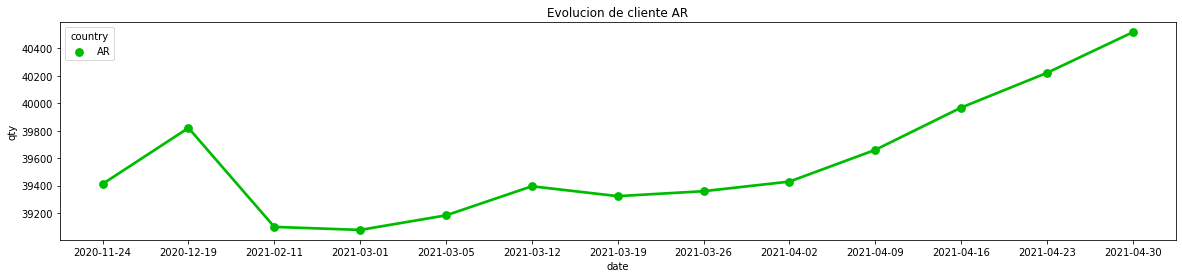

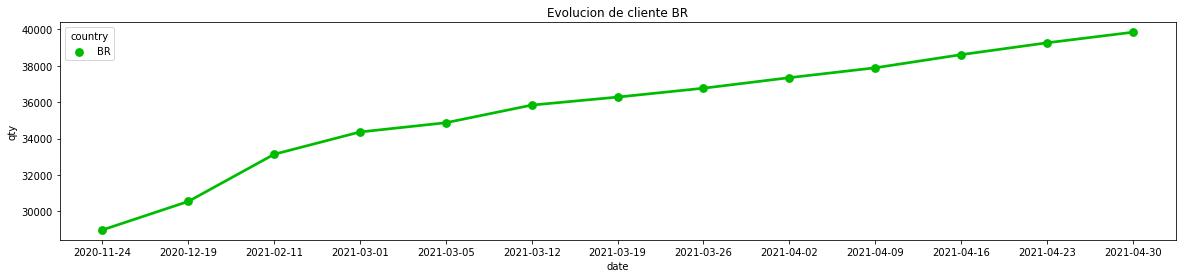

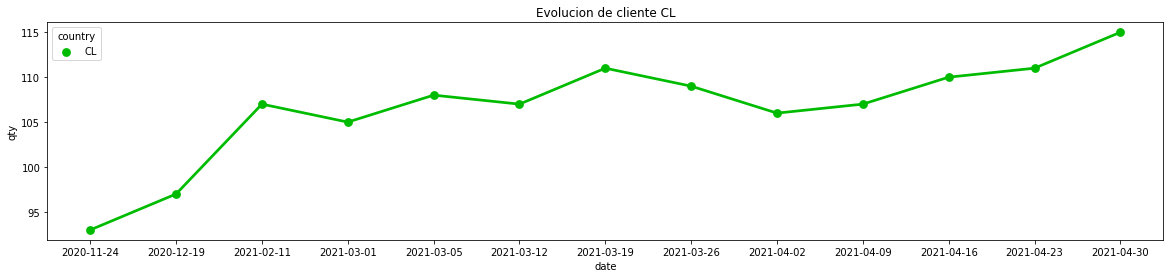

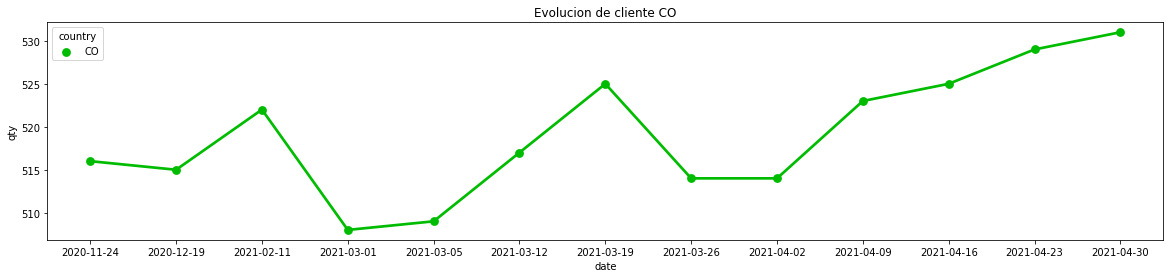

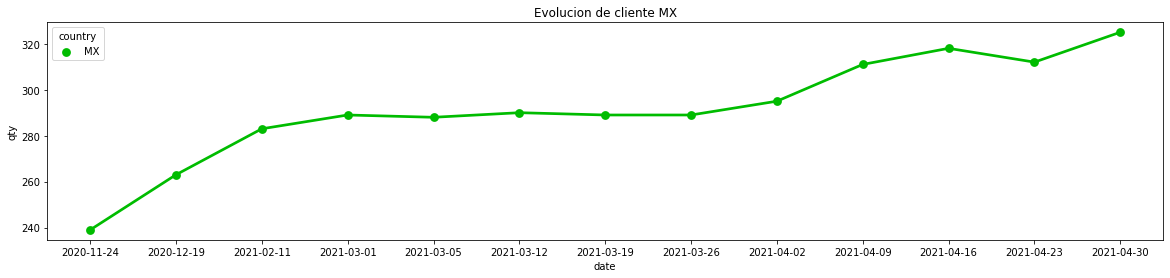

In [11]:
list_co=df_qty_client.country.unique()
palette = 'nipy_spectral'

for i in list_co:
    df_plot=df_qty_client[df_qty_client.country==i]
    fig,ax = plt.subplots(figsize=(20,4))
    sns.pointplot(data=df_plot, x='date', y='qty', hue='country', ax=ax,   dashes=False,palette=palette )
    ax.set(title="Evolucion de cliente " + i)
    

    